In [1]:
import pandas as pd
pd_gaia2mass = pd.read_csv("xmatch_gaiaedr3_2MASS_bygaiadr2.csv")
print(len(pd_gaia2mass))
pd.set_option('display.max_columns', 200)
pd_gaia2mass.head()

837518


solution_id                    designation            source_id  \
0  1636042515805110273  Gaia EDR3 4055138211979398528  4055138211979398528   
1  1636042515805110273  Gaia EDR3 4055138211979401216  4055138211979401216   
2  1636042515805110273  Gaia EDR3 4055138211988413056  4055138211988413056   
3  1636042515805110273  Gaia EDR3 4055138211992043776  4055138211992043776   
4  1636042515805110273  Gaia EDR3 4055138216280817536  4055138216280817536   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0     804015869     2016.0  265.495265  0.089635 -31.111450   0.064479   
1     798552414     2016.0  265.497613  0.178940 -31.110451   0.133959   
2    1452809151     2016.0  265.492379  0.332440 -31.111260   0.239670   
3    1777900121     2016.0  265.490141  0.231816 -31.110586   0.170252   
4    1058659701     2016.0  265.496247  0.028759 -31.105933   0.020992   

   parallax  parallax_error  parallax_over_error        pm      pmra  \
0  0.620708        0.099728             6.224004  2.330628  0.459739   
1  0.687452        0.187329             3.669749  5.237023 -0.677402   
2  0.719444        0.318221             2.260835  1.993215 -1.031587   
3  0.341196        0.230956             1.477321  2.941551 -1.053644   
4  1.095305        0.032440            33.763733  7.416302 -1.453819   

   pmra_error     pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  \
0    0.104536 -2.284834     0.058337     0.388324         -0.304837   
1    0.248407 -5.193028     0.125734     0.360187          0.025587   
2    0.364963 -1.705501     0.209012     0.523298         -0.115153   
3    0.285466 -2.746372     0.153291     0.444345         -0.056063   
4    0.034450 -7.272410     0.019317     0.272971         -0.132856   

   ra_pmra_corr  ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  \
0      0.058702      -0.270549          -0.486513      -0.132550   
1     -0.070089      -0.218096          -0.289421      -0.345241   
2     -0.097504      -0.385542          -0.344435      -0.295140   
3     -0.134197      -0.336969          -0.289997      -0.357123   
4     -0.030855      -0.185891          -0.379155      -0.185536   

   dec_pmdec_corr  parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
0       -0.831971            0.002009             0.545681         0.289638   
1       -0.833945            0.110136             0.419061         0.499271   
2       -0.851555            0.060386             0.447676         0.428273   
3       -0.853138            0.034068             0.393781         0.465157   
4       -0.818724            0.067178             0.481483         0.299786   

   astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
0                   506                     0                        504   
1                   479                     0                        477   
2                   460                     0                        457   
3                   483                     9                        482   
4                   483                     0                        483   

   astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
0                         2            2.430598            606.80990   
1                         2           -0.960162            505.48624   
2                         3            2.004633            612.34875   
3                         1            1.614073            609.02094   
4                         0           -0.725596            471.04575   

   astrometric_excess_noise  astrometric_excess_noise_sig  \
0                  0.000000                      0.000000   
1                  0.000000                      0.000000   
2                  0.991109                      4.397257   
3                  0.676032                      3.102422   
4                  0.000000                      0.000000   

   astrometric_params_solved  astrometric_primary_flag  \
0                         31          

In [2]:
import numpy as np
pd_gaia2mass["l"] = np.where(pd_gaia2mass["l"] >180, pd_gaia2mass["l"] -360, pd_gaia2mass["l"] )
pd_gaia2mass["Hw"] = pd_gaia2mass["h_m"] + 0.75 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) - 0.027 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"])
pd_gaia2mass["j_h"] = pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]
pd_gaia2mass["j_k"] = pd_gaia2mass["j_m"]-pd_gaia2mass["ks_m"]
pd_gaia2mass["g_k"] = pd_gaia2mass["phot_g_mean_mag"]-pd_gaia2mass["ks_m"]
pd_gaia2mass["distance"] = 1 / pd_gaia2mass["parallax"]* 1000
pd_gaia2mass["Mg"] = pd_gaia2mass["phot_g_mean_mag"] - (5 * np.log10(1 / pd_gaia2mass["parallax"]* 1000) - 5)
pd_gaia2mass['distance_from_center'] = np.sqrt(pd_gaia2mass["l"]*pd_gaia2mass["l"]+pd_gaia2mass["b"]*pd_gaia2mass["b"])
pd.set_option('display.max_columns', 200)
pd_gaia2mass.head()

/home/omiya/anaconda3/envs/jasmine/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


solution_id                    designation            source_id  \
0  1636042515805110273  Gaia EDR3 4055138211979398528  4055138211979398528   
1  1636042515805110273  Gaia EDR3 4055138211979401216  4055138211979401216   
2  1636042515805110273  Gaia EDR3 4055138211988413056  4055138211988413056   
3  1636042515805110273  Gaia EDR3 4055138211992043776  4055138211992043776   
4  1636042515805110273  Gaia EDR3 4055138216280817536  4055138216280817536   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0     804015869     2016.0  265.495265  0.089635 -31.111450   0.064479   
1     798552414     2016.0  265.497613  0.178940 -31.110451   0.133959   
2    1452809151     2016.0  265.492379  0.332440 -31.111260   0.239670   
3    1777900121     2016.0  265.490141  0.231816 -31.110586   0.170252   
4    1058659701     2016.0  265.496247  0.028759 -31.105933   0.020992   

   parallax  parallax_error  parallax_over_error        pm      pmra  \
0  0.620708        0.099728             6.224004  2.330628  0.459739   
1  0.687452        0.187329             3.669749  5.237023 -0.677402   
2  0.719444        0.318221             2.260835  1.993215 -1.031587   
3  0.341196        0.230956             1.477321  2.941551 -1.053644   
4  1.095305        0.032440            33.763733  7.416302 -1.453819   

   pmra_error     pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  \
0    0.104536 -2.284834     0.058337     0.388324         -0.304837   
1    0.248407 -5.193028     0.125734     0.360187          0.025587   
2    0.364963 -1.705501     0.209012     0.523298         -0.115153   
3    0.285466 -2.746372     0.153291     0.444345         -0.056063   
4    0.034450 -7.272410     0.019317     0.272971         -0.132856   

   ra_pmra_corr  ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  \
0      0.058702      -0.270549          -0.486513      -0.132550   
1     -0.070089      -0.218096          -0.289421      -0.345241   
2     -0.097504      -0.385542          -0.344435      -0.295140   
3     -0.134197      -0.336969          -0.289997      -0.357123   
4     -0.030855      -0.185891          -0.379155      -0.185536   

   dec_pmdec_corr  parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
0       -0.831971            0.002009             0.545681         0.289638   
1       -0.833945            0.110136             0.419061         0.499271   
2       -0.851555            0.060386             0.447676         0.428273   
3       -0.853138            0.034068             0.393781         0.465157   
4       -0.818724            0.067178             0.481483         0.299786   

   astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
0                   506                     0                        504   
1                   479                     0                        477   
2                   460                     0                        457   
3                   483                     9                        482   
4                   483                     0                        483   

   astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
0                         2            2.430598            606.80990   
1                         2           -0.960162            505.48624   
2                         3            2.004633            612.34875   
3                         1            1.614073            609.02094   
4                         0           -0.725596            471.04575   

   astrometric_excess_noise  astrometric_excess_noise_sig  \
0                  0.000000                      0.000000   
1                  0.000000                      0.000000   
2                  0.991109                      4.397257   
3                  0.676032                      3.102422   
4                  0.000000                      0.000000   

   astrometric_params_solved  astrometric_primary_flag  \
0                         31          

In [3]:
min_l = -2
max_l = 0.7
min_b = 0
max_b = 0.3
pd_gaia2mass_jsky = pd_gaia2mass.query( '(@min_l <= l <= @max_l and @min_b <= b <= @max_b) or distance_from_center<0.7')
print(len(pd_gaia2mass_jsky))
pd_gaia2mass_jsky.to_csv("xmatch_gaiaedr3_2MASS_bygaiadr2_v2.csv")
pd_gaia2mass_jsky.head()

77050


solution_id                    designation  \
110526  1636042515805110273  Gaia EDR3 4060593198403873792   
110534  1636042515805110273  Gaia EDR3 4060593198410850560   
110535  1636042515805110273  Gaia EDR3 4060593198410851712   
110536  1636042515805110273  Gaia EDR3 4060593202704439808   
110544  1636042515805110273  Gaia EDR3 4060593202749119232   

                  source_id  random_index  ref_epoch          ra  ra_error  \
110526  4060593198403873792     476520653     2016.0  266.132094  0.112051   
110534  4060593198410850560     994502486     2016.0  266.137857  1.385989   
110535  4060593198410851712    1601070905     2016.0  266.138958  0.673125   
110536  4060593202704439808    1106805204     2016.0  266.138877  0.735179   
110544  4060593202749119232     523141173     2016.0  266.132590  0.057325   

              dec  dec_error  parallax  parallax_error  parallax_over_error  \
110526 -28.286220   0.085324  0.395601        0.132035             2.996179   
110534 -28.284957   0.907056  2.192921        1.511197             1.451115   
110535 -28.276578   0.479445  0.520995        0.643869             0.809163   
110536 -28.281432   0.517113  0.722404        0.652482             1.107161   
110544 -28.291020   0.042515  0.543491        0.062667             8.672646   

               pm      pmra  pmra_error     pmdec  pmdec_error  ra_dec_corr  \
110526   3.235812 -1.424490    0.149592 -2.905394     0.081049     0.233256   
110534   2.185916 -1.819939    1.644965 -1.210807     0.891068     0.510056   
110535   3.387253 -3.372644    0.809625  0.314245     0.453696     0.464357   
110536  10.434248 -9.561052    0.727207 -4.178492     0.442747     0.643702   
110544   3.820362 -2.750097    0.074945 -2.651817     0.041505     0.236242   

        ra_parallax_corr  ra_pmra_corr  ra_pmdec_corr  dec_parallax_corr  \
110526         -0.158944      0.025527      -0.074178          -0.429679   
110534         -0.537190      0.112925      -0.257855          -0.447584   
110535         -0.087324     -0.020870      -0.218130          -0.156817   
110536         -0.332670     -0.090131      -0.405678          -0.371741   
110544         -0.105163     -0.020561      -0.083947          -0.278183   

        dec_pmra_corr  dec_pmdec_corr  parallax_pmra_corr  \
110526       0.063685       -0.705580           -0.185109   
110534      -0.041580       -0.671750           -0.356328   
110535      -0.131304       -0.669135           -0.149536   
110536      -0.190170       -0.741801           -0.068063   
110544      -0.040932       -0.670858           -0.039703   

        parallax_pmdec_corr  pmra_pmdec_corr  astrometric_n_obs_al  \
110526             0.409811         0.159324                   405   
110534             0.260423         0.286477                   230   
110535             0.153101         0.381923                   340   
110536             0.310446         0.404711                   340   
110544             0.333411         0.244509                   408   

        astrometric_n_obs_ac  astrometric_n_good_obs_al  \
110526                     0                        403   
110534                     0                        228   
110535                     0                        339   
110536                     0                        339   
110544                     0                        407   

        astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
110526                         2            1.422572            459.43460   
110534                         2            3.348362            340.84085   
110535                         1            4.394321            504.59067   
110536                         1            4.419433            537.30560   
110544                         1           -0.379881            408.89743   

        astrometric_excess_noise  astrometric_excess_noise_sig  \
110526                  0.000000                      0.000000   
110534                  4.079

In [4]:
# import numpy as np
# from astropy import units as u
# from astropy.coordinates import SkyCoord
# lcenter = 0
# bcenter = 0
# ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
# sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
# print(sky_org)
# width = 1.5

# min_ra = sky_org[0] - width/2
# max_ra = sky_org[0] + width/2
# min_dec = sky_org[1] - width/2
# max_dec = sky_org[1] + width/2
# pd_gaia2mass_jsky = pd_gaia2mass.query( '@min_ra <= ra <= @max_ra and @min_dec <= dec <= @max_dec')
# print(len(pd_gaia2mass_jsky))
# pd_gaia2mass_jsky.head()

In [5]:
min_Hw_b = 3.0
max_Hw_b = 9.5
pd_gaia2mass_b = pd_gaia2mass.query( '@min_Hw_b <= Hw < @max_Hw_b')
pd_gaia2mass_jsky_b = pd_gaia2mass_jsky.query( '@min_Hw_b <= Hw < @max_Hw_b')
print(len(pd_gaia2mass_jsky_b))

min_Hw_t = 9.5
max_Hw_t = 15.0
pd_gaia2mass_t = pd_gaia2mass.query( '@min_Hw_t <= Hw < @max_Hw_t')
pd_gaia2mass_jsky_t = pd_gaia2mass_jsky.query( '@min_Hw_t <= Hw < @max_Hw_t')
print(len(pd_gaia2mass_jsky_t))

min_parallax_f = 1
max_parallax_f = 5
pd_gaia2mass_f = pd_gaia2mass.query( '@min_parallax_f <= parallax < @max_parallax_f')
pd_gaia2mass_jsky_f = pd_gaia2mass_jsky.query( '@min_parallax_f <= parallax < @max_parallax_f')
print(len(pd_gaia2mass_f))
print(len(pd_gaia2mass_jsky_f))

min_parallax_n = 5
max_parallax_n = 10
pd_gaia2mass_n = pd_gaia2mass.query( '@min_parallax_n <= parallax < @max_parallax_n')
pd_gaia2mass_jsky_n = pd_gaia2mass_jsky.query( '@min_parallax_n <= parallax < @max_parallax_n')
print(len(pd_gaia2mass_n))
print(len(pd_gaia2mass_jsky_n))

min_parallax_m = 10
max_parallax_m = 100
pd_gaia2mass_m = pd_gaia2mass.query( '@min_parallax_m <= parallax < @max_parallax_m')
pd_gaia2mass_jsky_m = pd_gaia2mass_jsky.query( '@min_parallax_m <= parallax < @max_parallax_m')
print(len(pd_gaia2mass_m))
print(len(pd_gaia2mass_jsky_m))

603
58250
64989
8552
1556
124
230
15


In [6]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
14406


RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source     Plx  \
0  266.296806    14.8761 -29.135035     9.7728  4057104070060689280     NaN   
1  266.294476     2.3699 -29.135177     1.7434  4057104074345828736     NaN   
2  266.295908     0.0418 -29.134110     0.0336  4057104074348007808  0.4910   
3  266.275460     0.3111 -29.133310     0.2450  4057104104409847040  0.4692   
4  266.273611     1.9220 -29.133917     2.2113  4057104108705564288     NaN   

    e_Plx     PM   pmRA  e_pmRA   pmDE  e_pmDE   RUWE            FG     e_FG  \
0     NaN    NaN    NaN     NaN    NaN     NaN    NaN     79.003998  1.11960   
1     NaN    NaN    NaN     NaN    NaN     NaN    NaN    104.040001  0.87496   
2  0.0459  3.394 -0.052   0.050 -3.394   0.032  1.149  11382.000000  4.03720   
3  0.3106  0.260 -0.150   0.376  0.213   0.232  1.036    518.119995  1.10150   
4     NaN    NaN    NaN     NaN    NaN     NaN    NaN    103.379997  0.76817   

        Gmag    e_Gmag          FBP      e_FBP      BPmag   e_BPmag  \
0  20.943241  0.015631   141.800003  84.369003  19.959318  0.645981   
1  20.644325  0.009537    32.414001   6.943900  21.561722  0.232612   
2  15.546850  0.002782  3901.100098  17.056000  16.360567  0.005506   
3  18.901281  0.003594    49.337002   9.537200  21.105600  0.209896   
4  20.651226  0.008525    27.243000   3.652300  21.750422  0.145586   

            FRP    e_FRP      RPmag   e_RPmag     BP-RP  RVDR2  e_RVDR2  \
0    170.199997  11.4080  19.170520  0.072876  0.788797    NaN      NaN   
1    127.269997   6.4187  19.486113  0.054890  2.075609    NaN      NaN   
2  10947.000000  14.5220  14.649655  0.004045  1.710912    NaN      NaN   
3    970.989990   9.6315  17.279858  0.011414  3.825743    NaN      NaN   
4    154.639999  13.7250  19.274565  0.096438  2.475857    NaN      NaN   

   Tefftemp  loggtemp                PS1  SDSSDR13  SkyMapper2  URAT1  \
0       NaN       NaN  73032662968138256      <NA>        <NA>   <NA>   
1       NaN       NaN  73032662945378144      <NA>        <NA>   <NA>   
2       NaN       NaN  73032662959129392      <NA>   164532442   <NA>   
3       NaN       NaN  73042662754720336      <NA>   164532424   <NA>   
4       NaN       NaN  73032662736229616      <NA>        <NA>   <NA>   

    GmagCorr  e_GmagCorr        FGCorr     RAJ2000    DEJ2000        GLON  \
0  20.943241    0.015631     79.003998  266.296806 -29.135035  359.780990   
1  20.644325    0.009537    104.040001  266.294476 -29.135177  359.779807   
2  15.546850    0.002782  11382.000000  266.295908 -29.134095  359.781370   
3  18.875690    0.003560    530.479980  266.275461 -29.133311  359.772731   
4  20.651226    0.008525    103.379997  266.273611 -29.133917  359.771370   

       GLAT  
0 -0.022975  
1 -0.021313  
2 -0.021824  
3 -0.006171  
4 -0.005109

In [7]:
pd_gaiaedr3 = table_pd
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3.tail()

RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source  \
14401  266.259957     0.7018 -28.740781     0.5462  4057542126648999296   
14402  266.254121     1.1961 -28.743824     0.9806  4057542126649000320   
14403  266.257370     0.0213 -28.738221     0.0162  4057542126655543296   
14404  266.257230    21.4004 -28.742736    14.2429  4057542126658278016   
14405  266.254639    37.9178 -28.742269    21.1011  4057542126660123648   

          Plx   e_Plx     PM   pmRA  e_pmRA   pmDE  e_pmDE   RUWE  \
14401  0.2755  0.6345  3.722 -3.719   0.735  0.147   0.485  0.901   
14402  1.1259  0.7238  8.541 -6.916   1.286 -5.012   0.860  1.058   
14403  0.7610  0.0249  2.763  0.017   0.026 -2.763   0.016  1.028   
14404     NaN     NaN    NaN    NaN     NaN    NaN     NaN    NaN   
14405     NaN     NaN    NaN    NaN     NaN    NaN     NaN    NaN   

                 FG     e_FG       Gmag    e_Gmag           FBP      e_FBP  \
14401    174.419998  0.75276  20.083382  0.005436     54.620998  10.246000   
14402    161.380005  0.70006  20.167719  0.005457     33.516998   3.617100   
14403  27286.000000  5.34240  14.597526  0.002764  12401.000000  13.526000   
14404     73.983002  1.97990  21.014540  0.029186     26.629000  11.475000   
14405     68.351997  1.66530  21.100494  0.026596     41.705002  47.054001   

           BPmag   e_BPmag           FRP    e_FRP      RPmag   e_RPmag  \
14401  20.995136  0.203678    213.589996   8.9891  18.923962  0.045851   
14402  21.525370  0.117202    216.190002   8.7245  18.910826  0.043979   
14403  15.104913  0.003031  21496.000000  14.2830  13.917003  0.003848   
14404  21.775171  0.467867    104.959999  13.5770  19.695326  0.140491   
14405  21.288073  1.225004    146.990005  21.1910  19.329681  0.156571   

          BP-RP  RVDR2  e_RVDR2  Tefftemp  loggtemp                PS1  \
14401  2.071175    NaN      NaN       NaN       NaN  73512662599541344   
14402  2.614544    NaN      NaN       NaN       NaN  73502662541477728   
14403  1.187910    NaN      NaN       NaN       NaN  73512662573754448   
14404  2.079845    NaN      NaN       NaN       NaN  73502662572299040   
14405  1.958391    NaN      NaN       NaN       NaN  73502662546199584   

       SDSSDR13  SkyMapper2  URAT1   GmagCorr  e_GmagCorr        FGCorr  \
14401      <NA>   164548044   <NA>  20.073331    0.005399    176.039993   
14402      <NA>   164547970   <NA>  20.148094    0.005384    164.330002   
14403      <NA>   164548052   <NA>  14.597526    0.002764  27286.000000   
14404      <NA>        <NA>   <NA>  21.014540    0.029186     73.983002   
14405      <NA>        <NA>   <NA>  21.100494    0.026596     68.351997   

          RAJ2000    DEJ2000      GLON      GLAT  
14401  266.259976 -28.740782  0.100450  0.210309  
14402  266.254156 -28.743802  0.095183  0.213084  
14403  266.257370 -28.738209  0.101449  0.213580  
14404  266.257230 -28.742736  0.097535  0.211328  
14405  266.254639 -28.742269  0.096747  0.213509

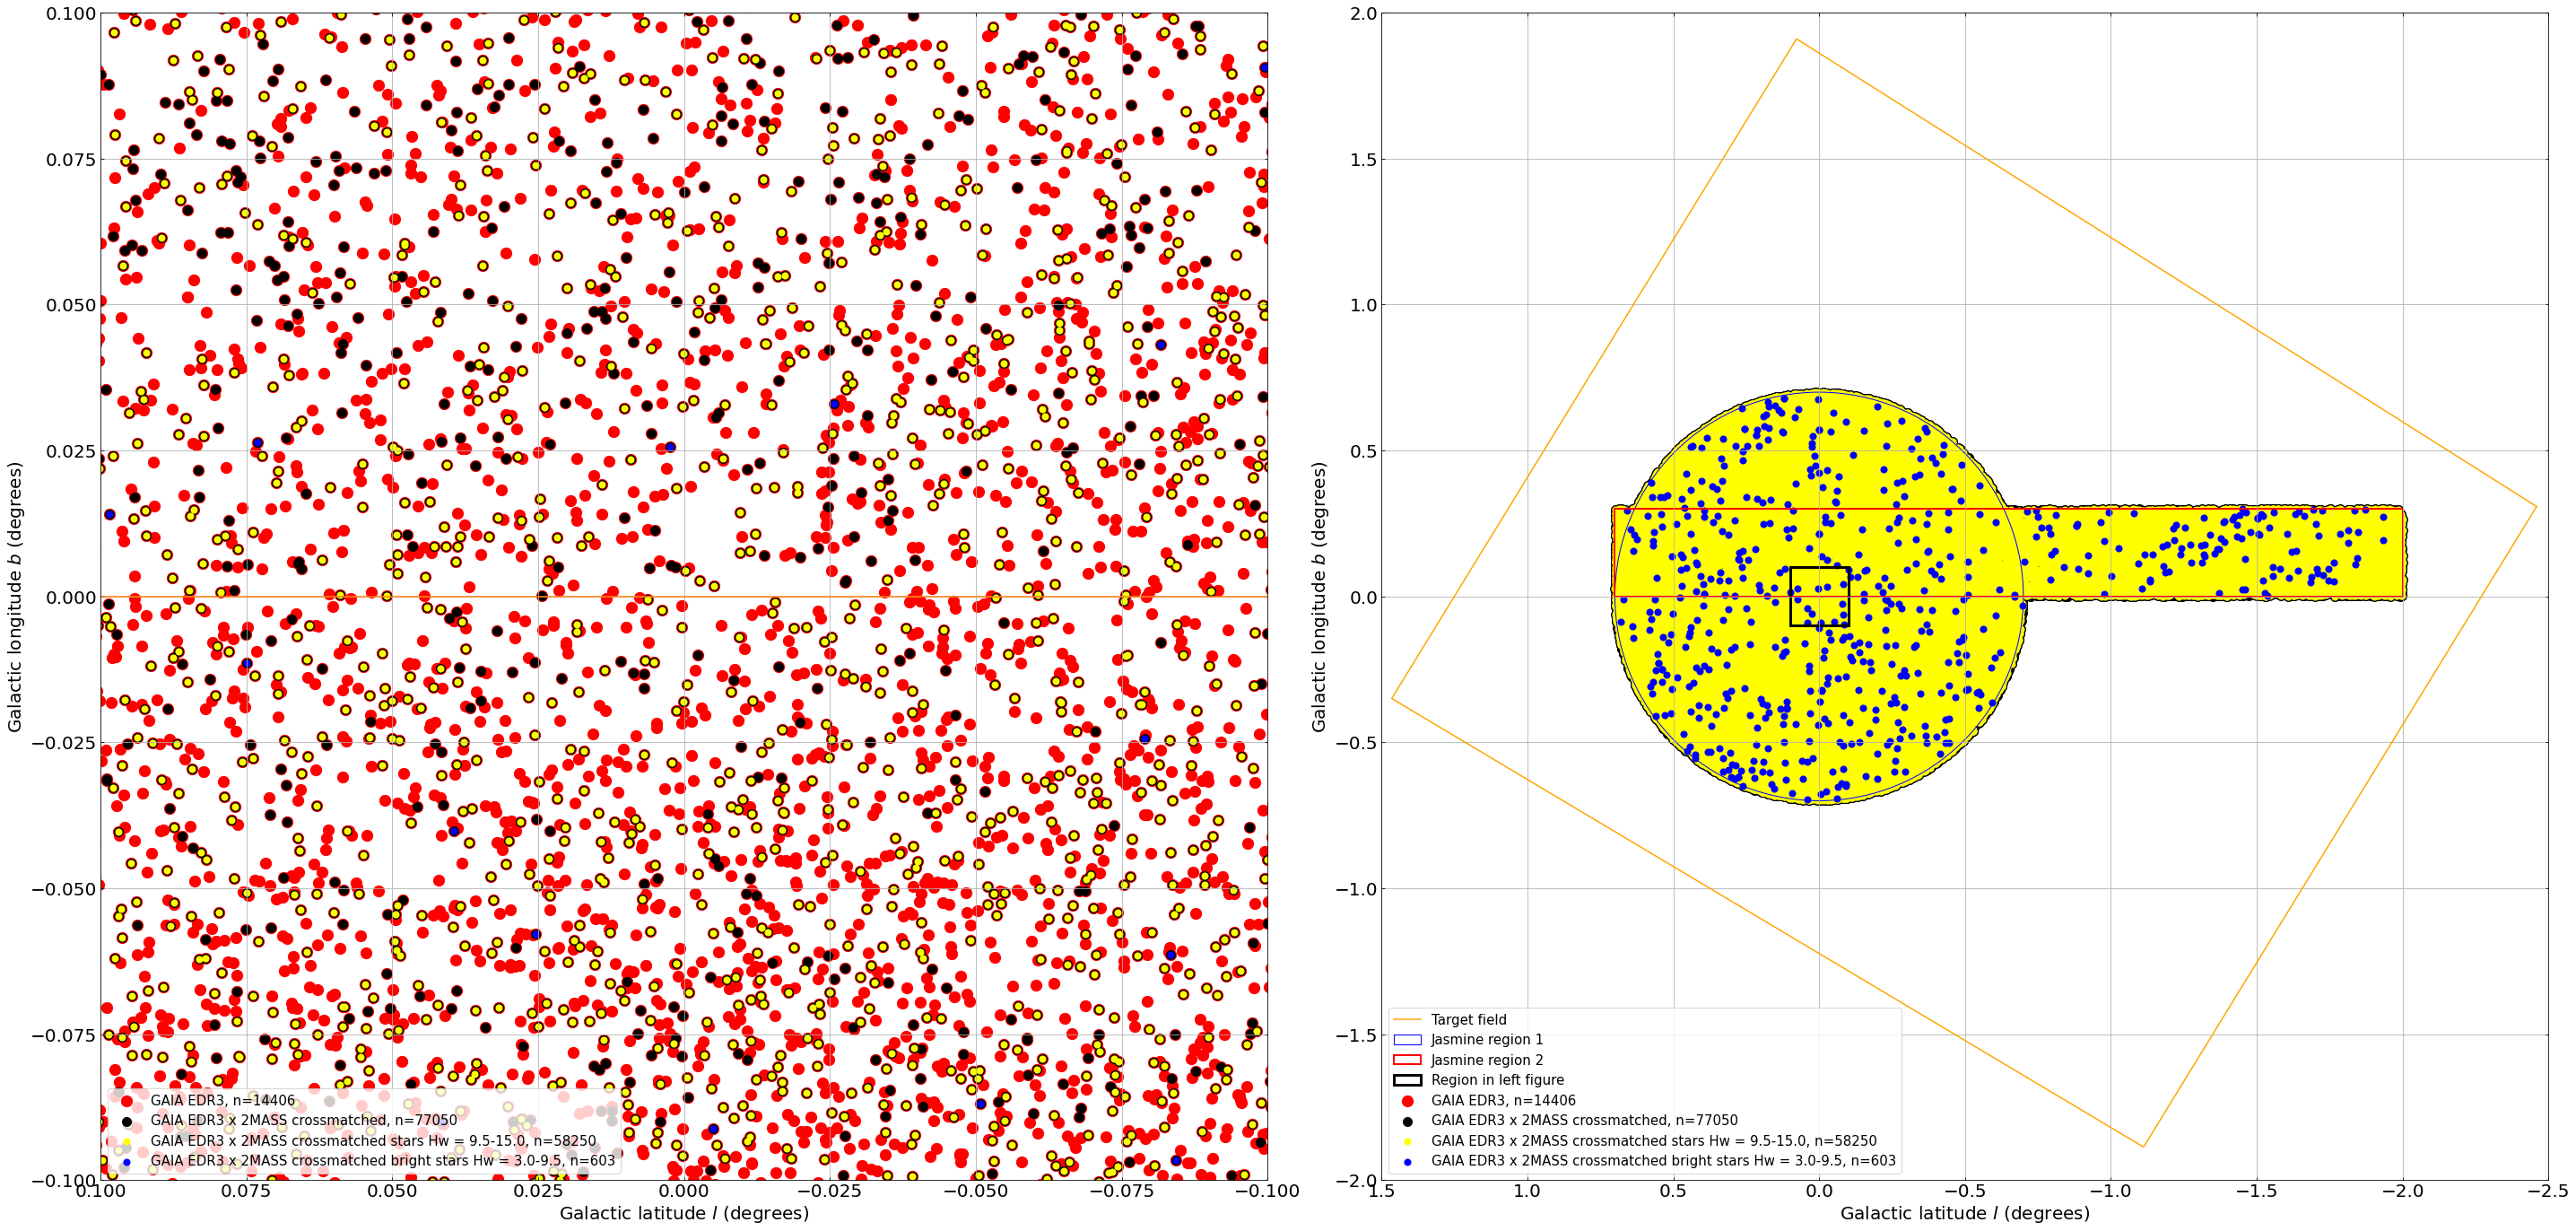

In [8]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(pd_gaia2mass_jsky_t["l"], pd_gaia2mass_jsky_t["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = "+str(min_Hw_t)+"-"+str(max_Hw_t)+", n="+str(len(pd_gaia2mass_jsky_t)))
ax1.scatter(pd_gaia2mass_jsky_b["l"], pd_gaia2mass_jsky_b["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw = "+str(min_Hw_b)+"-"+str(max_Hw_b)+", n="+str(len(pd_gaia2mass_jsky_b)))

ax2.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(pd_gaia2mass_jsky_t["l"], pd_gaia2mass_jsky_t["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = "+str(min_Hw_t)+"-"+str(max_Hw_t)+", n="+str(len(pd_gaia2mass_jsky_t)))
ax2.scatter(pd_gaia2mass_jsky_b["l"], pd_gaia2mass_jsky_b["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw = "+str(min_Hw_b)+"-"+str(max_Hw_b)+", n="+str(len(pd_gaia2mass_jsky_b)))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb.png")

In [9]:
def make_histogram(x, nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(15,15))
    ax = pp.axes()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.hist(pd_gaia2mass[x], bins=nbin, range=brange, label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.hist(pd_gaia2mass_jsky[x], bins=nbin, range=brange, label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.hist(pd_gaia2mass_t[x], bins=nbin, range=brange, label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.hist(pd_gaia2mass_jsky_t[x], bins=nbin, range=brange, label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.hist(pd_gaia2mass_b[x], bins=nbin, range=brange, label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.hist(pd_gaia2mass_jsky_b[x], bins=nbin, range=brange, label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.hist(pd_gaia2mass_f[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.hist(pd_gaia2mass_jsky_f[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.hist(pd_gaia2mass_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.hist(pd_gaia2mass_jsky_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.hist(pd_gaia2mass_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: pp.hist(pd_gaia2mass_jsky_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))
    
    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel("Number of stars", fontsize=20)
    pp.show()

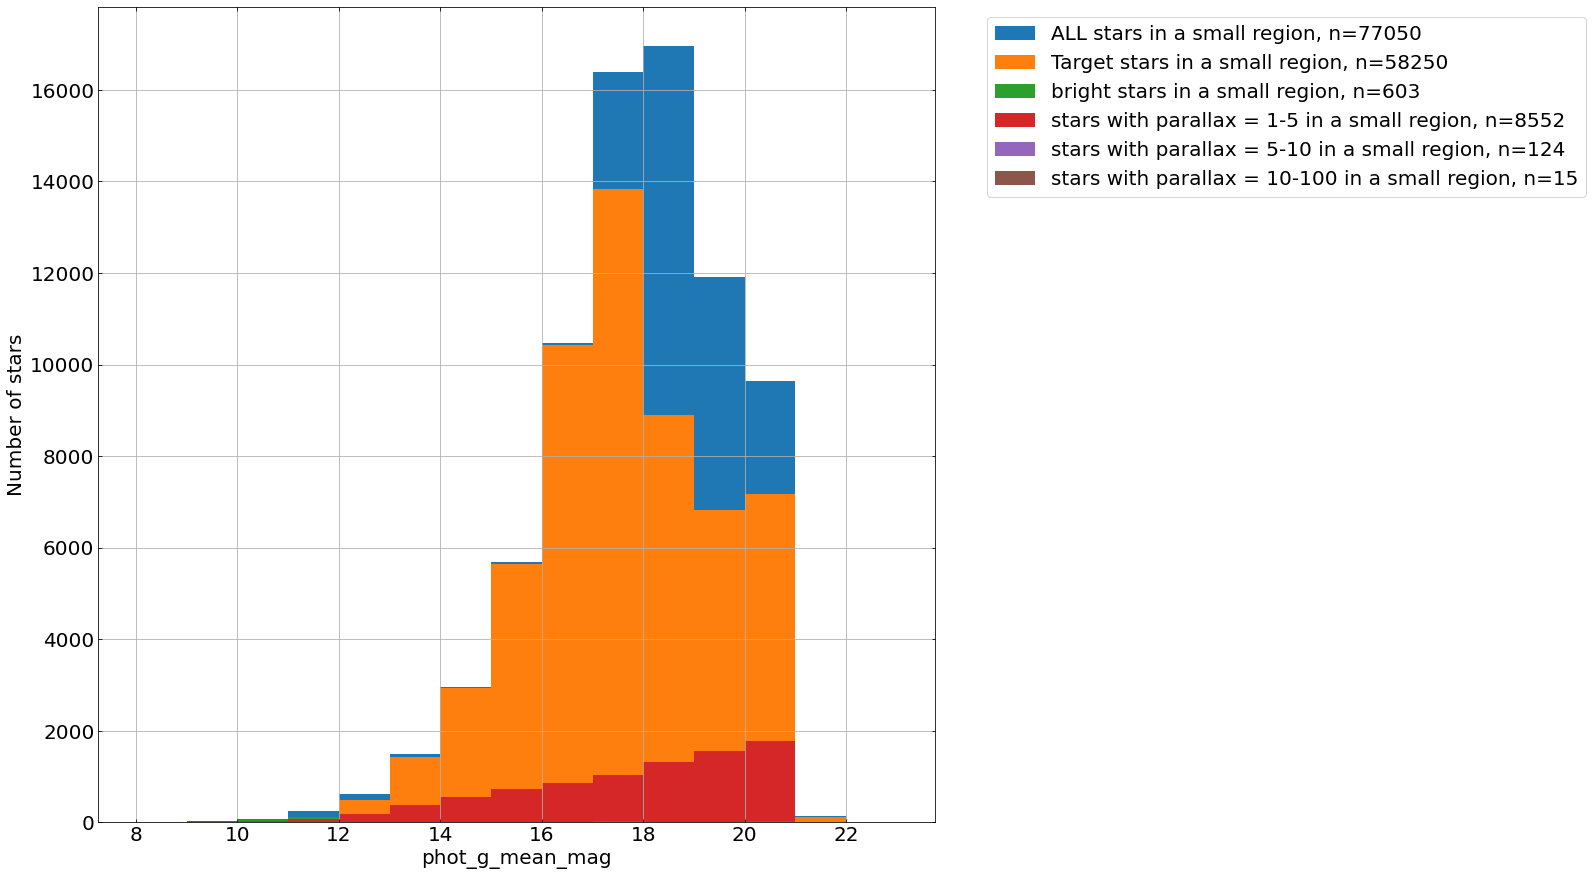

In [10]:
p1 = False   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = True   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = True   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = True   # stars with parallax = 10-100 in a small region
nbin = 15
brange = (8, 23)
make_histogram("phot_g_mean_mag", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

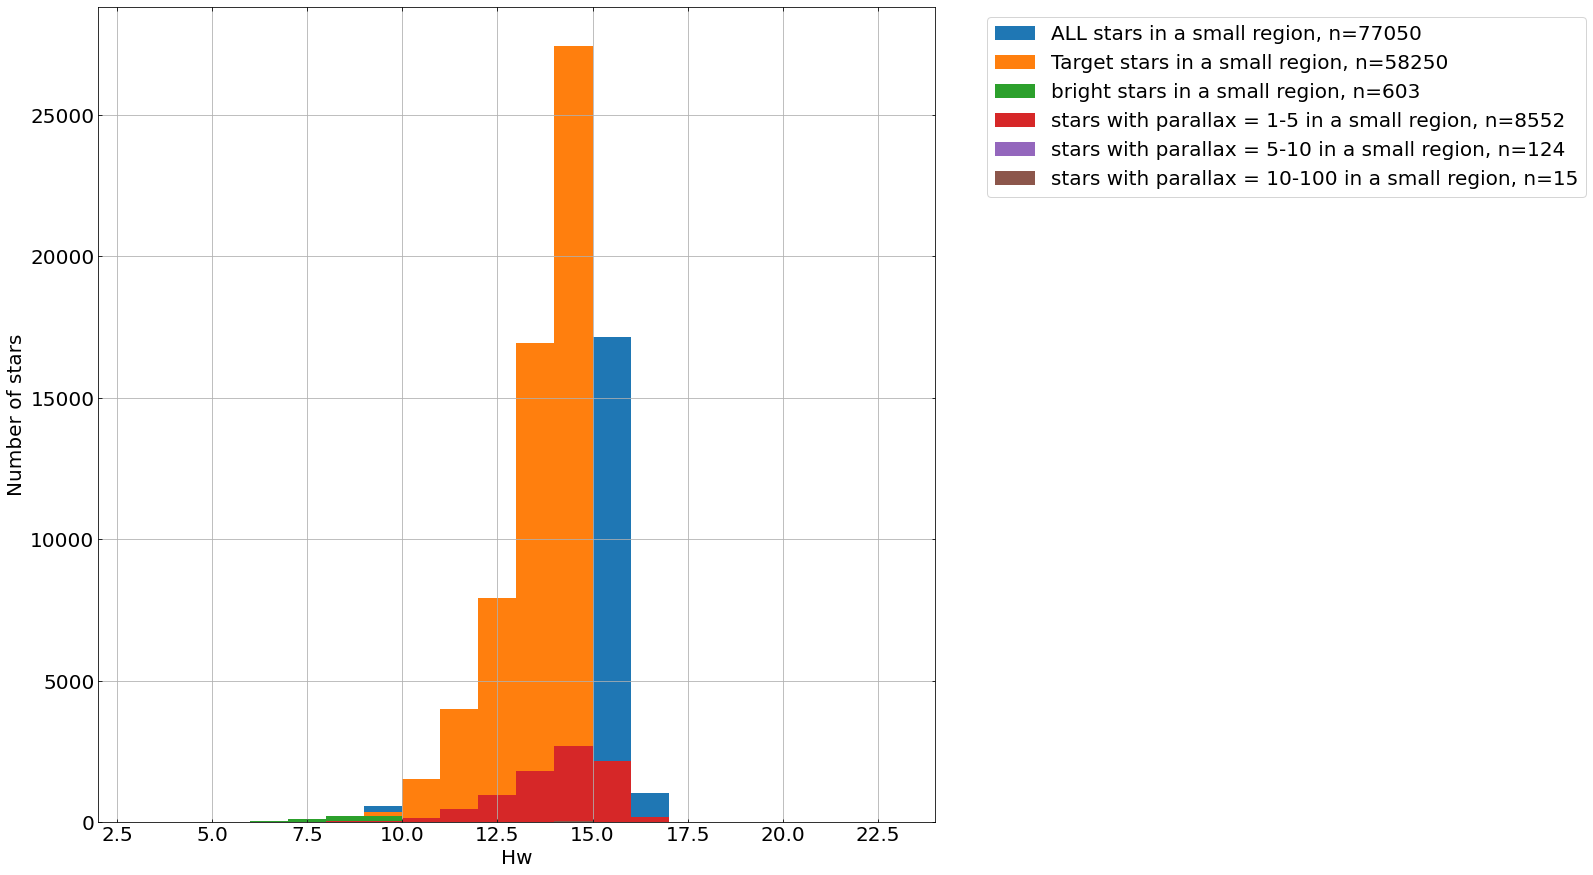

In [11]:
p1 = False   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = True   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = True   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = True   # stars with parallax = 10-100 in a small region
nbin = 20
brange = (3, 23)
make_histogram("Hw", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

In [12]:
def make_figure(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(20,20))
    ax = pp.axes()
    ax.invert_yaxis()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: pp.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    if x == "bp_rp" and y == "Mg": pp.scatter(0.82, 4.67, s=500, marker='$\\bigodot$', label="Sun") # Sun (Casagrande & VandenBerg 2018)

    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel(y, fontsize=20)
    pp.show()

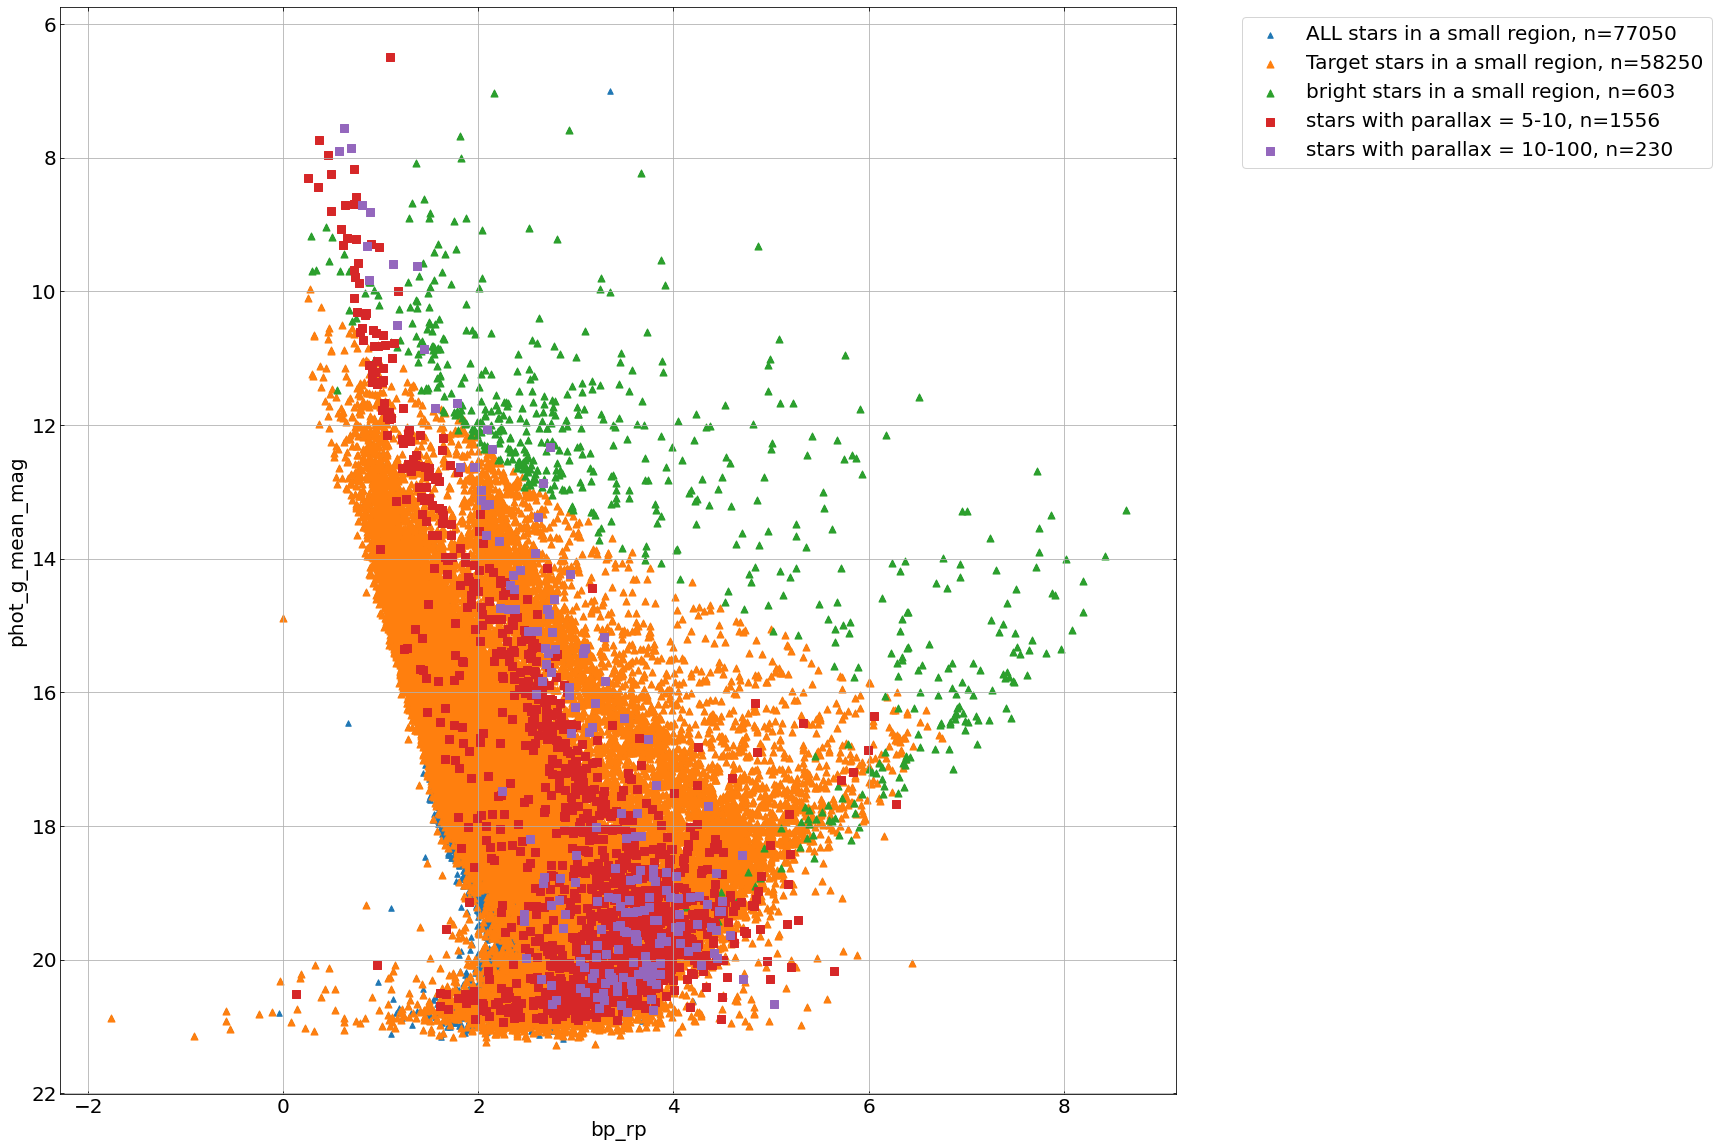

In [13]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure("bp_rp", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

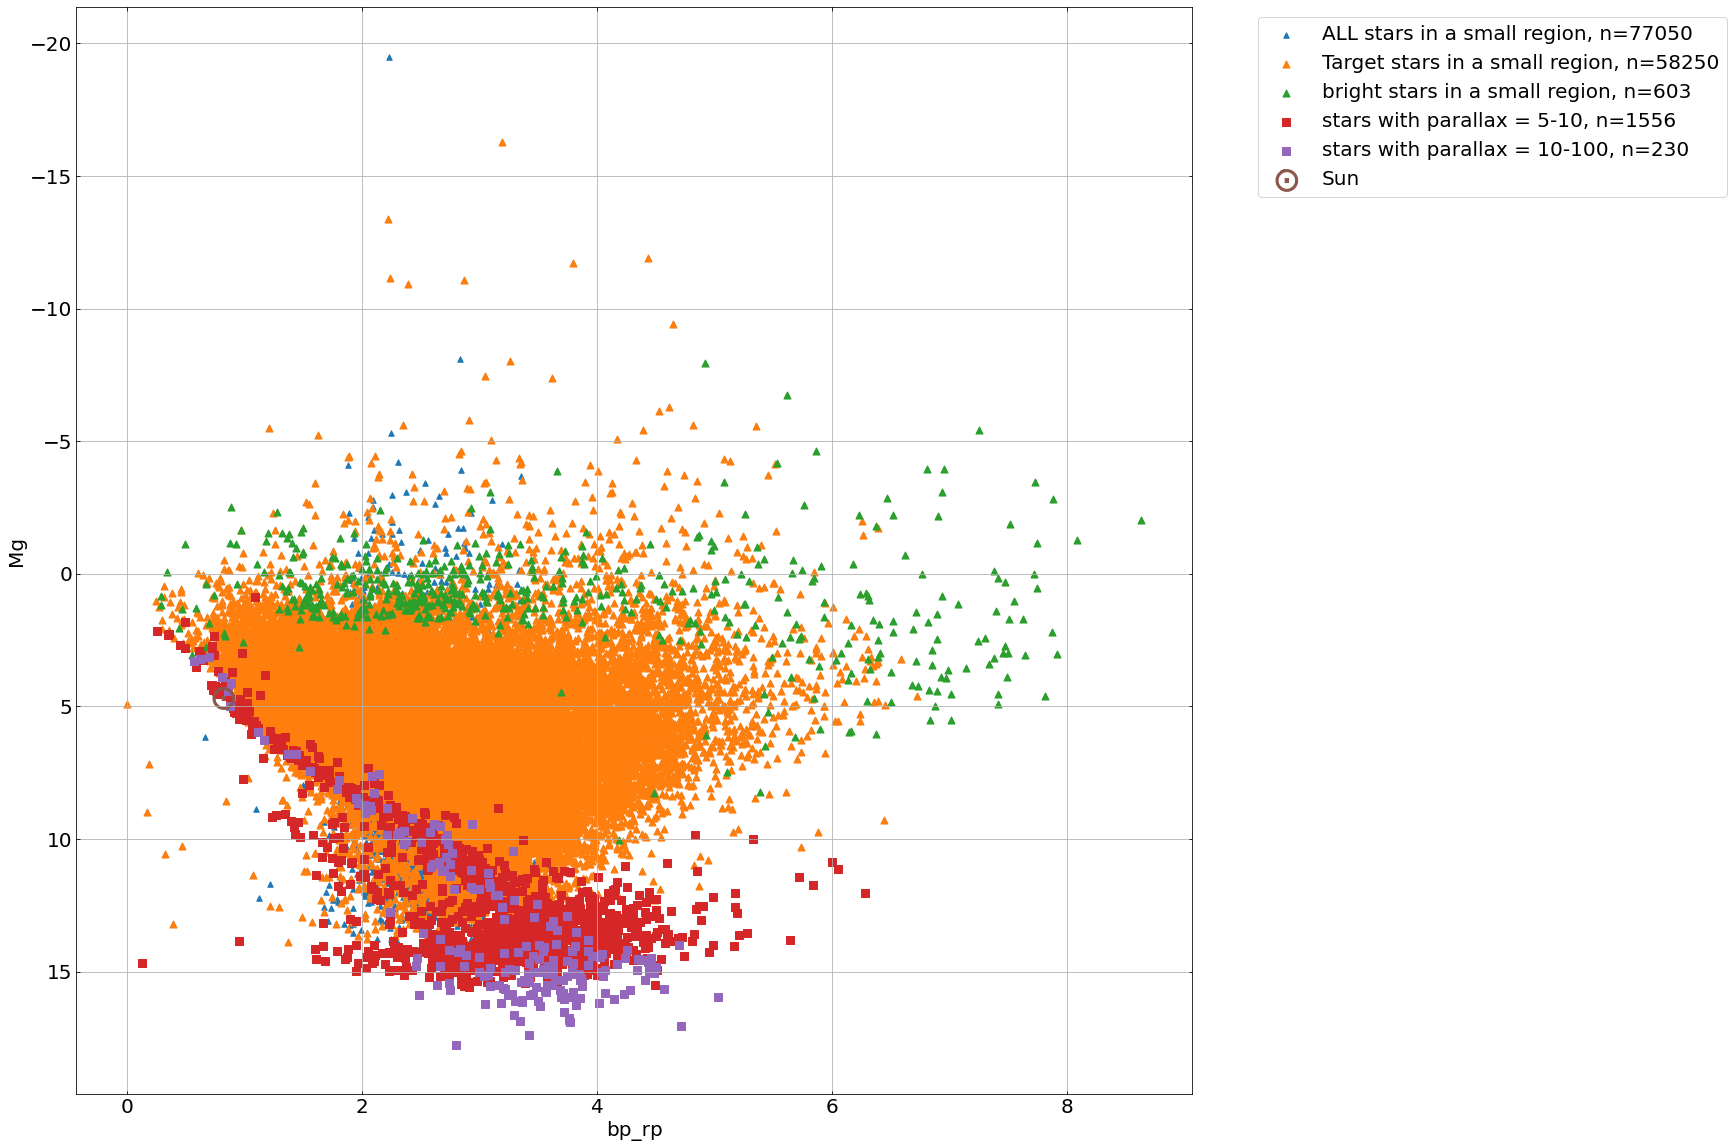

In [14]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

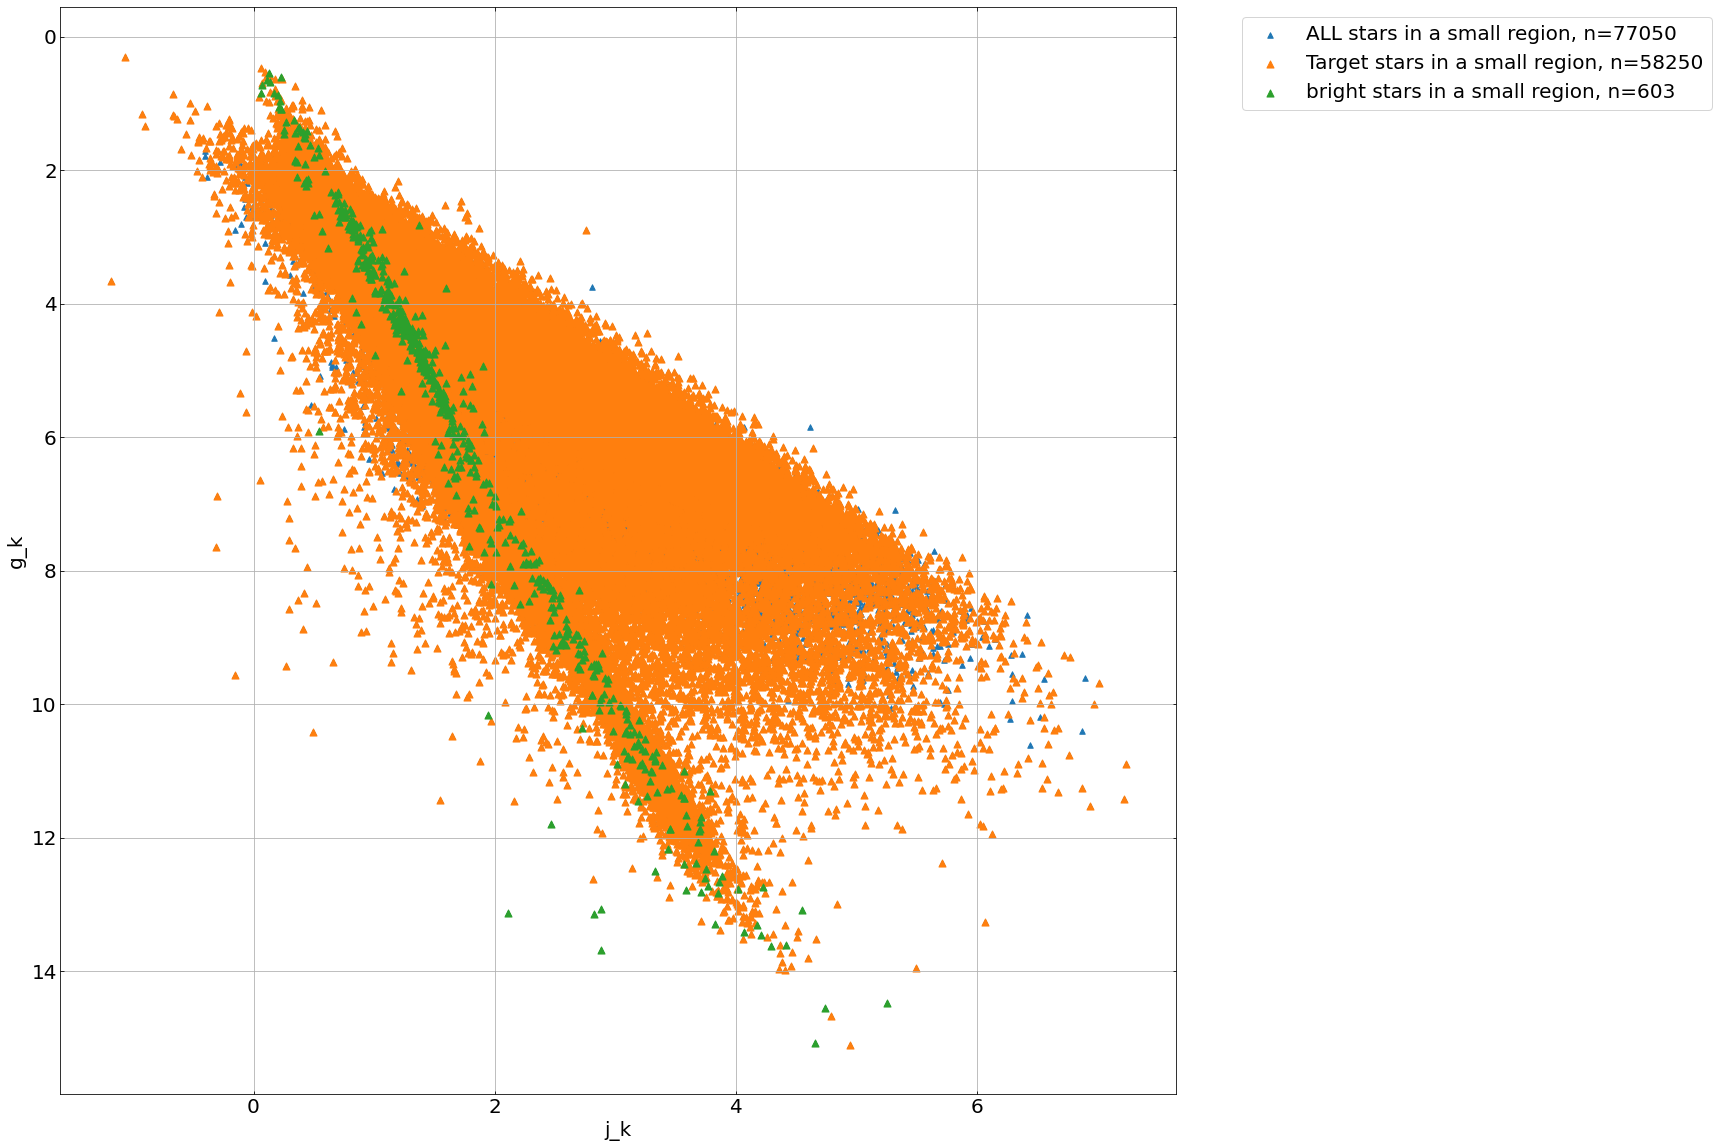

In [15]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure("j_k", "g_k", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

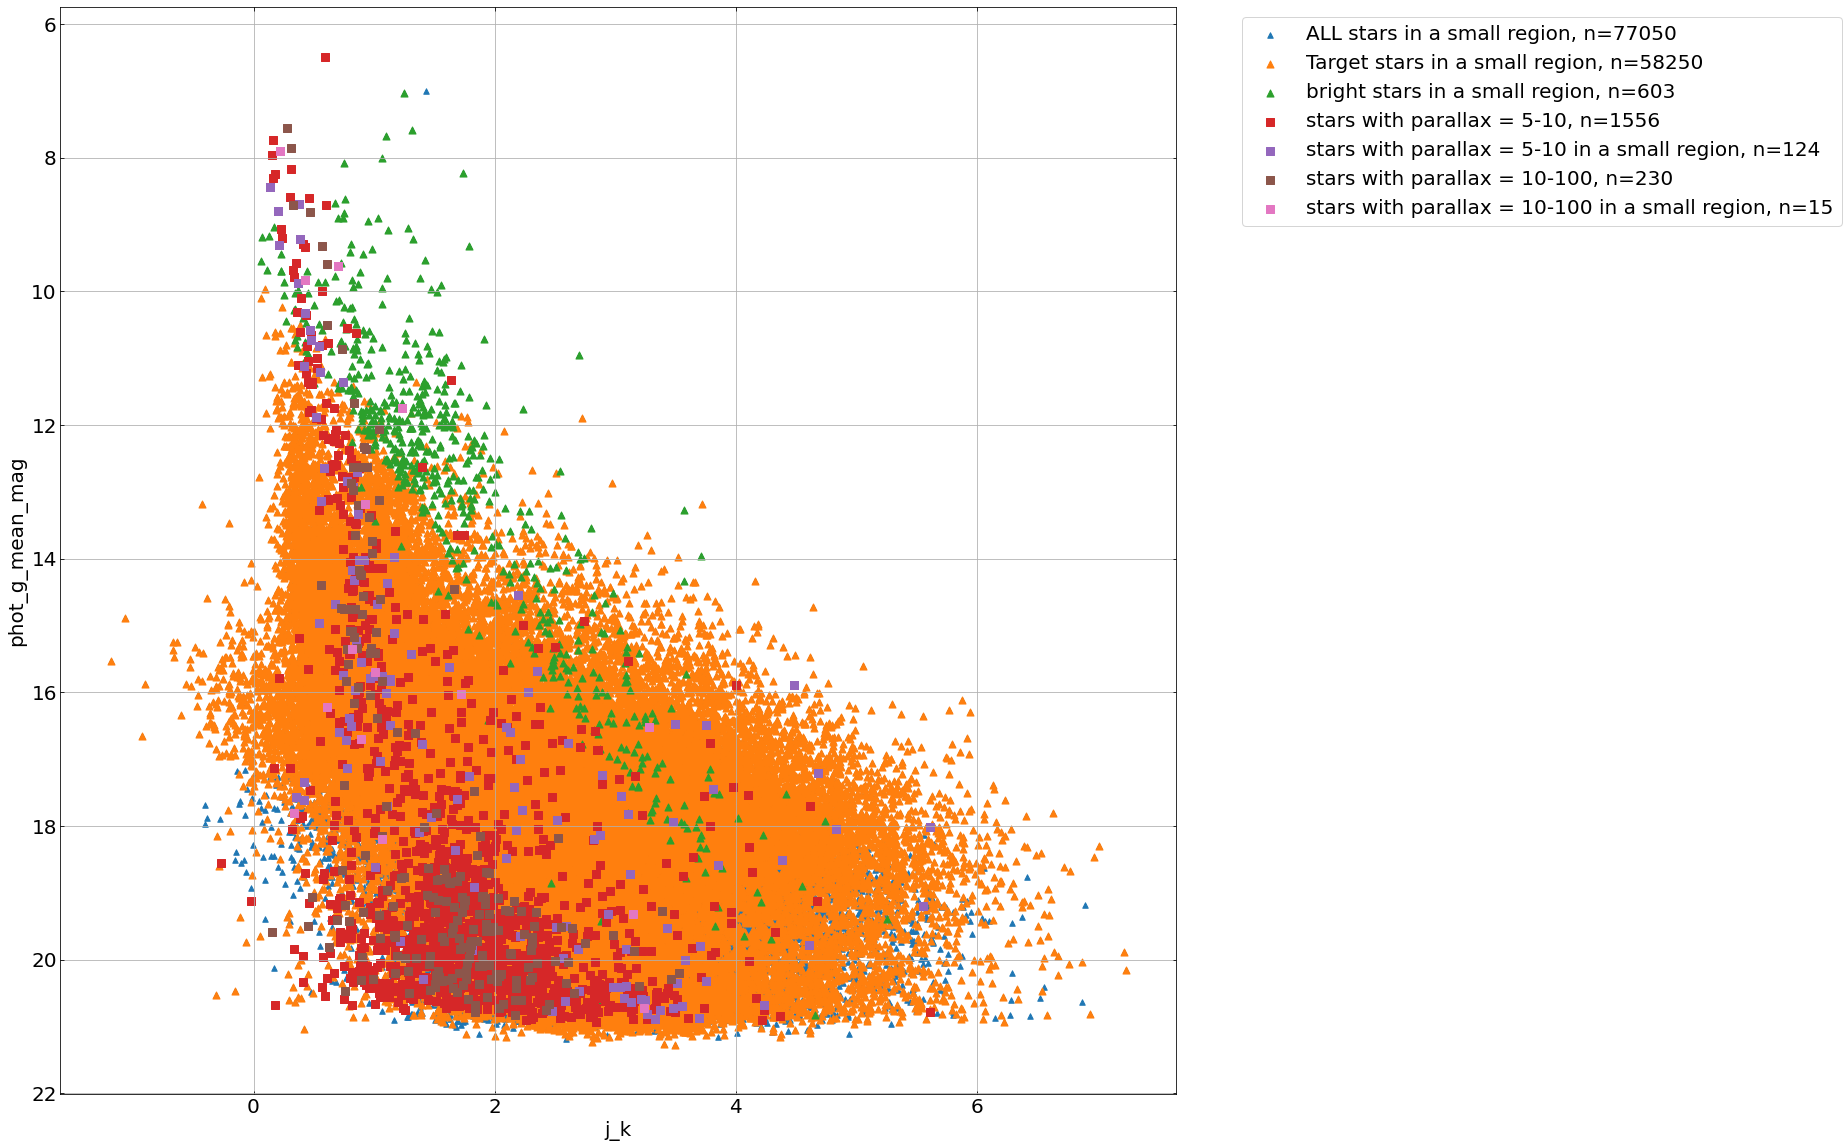

In [16]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure("j_k", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

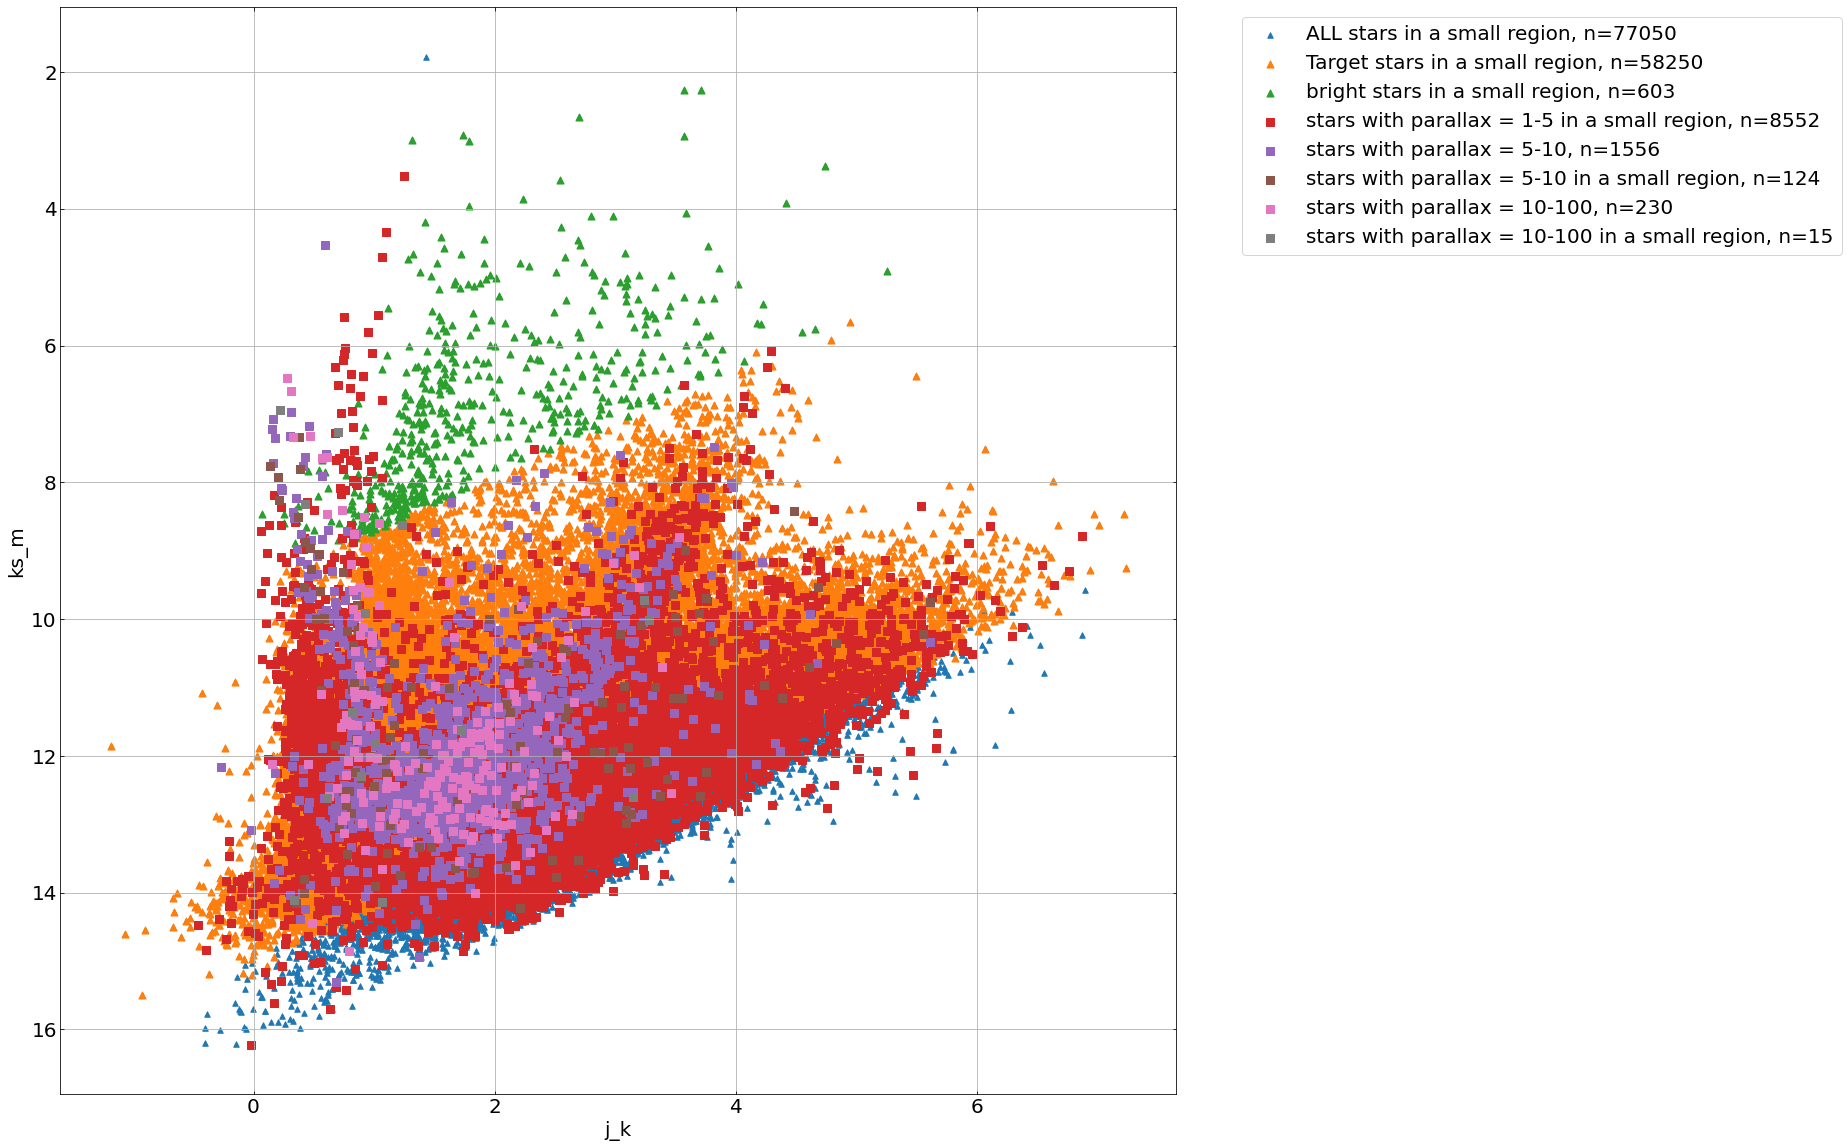

In [17]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = True # stars with parallax = 15-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure("j_k", "ks_m", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

In [18]:
def make_figure1(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(20,20))
    ax = pp.axes()
    ax.invert_yaxis()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_n)))
    if p12: pp.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    pp.xscale("log")
    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel(y, fontsize=20)
    pp.show()

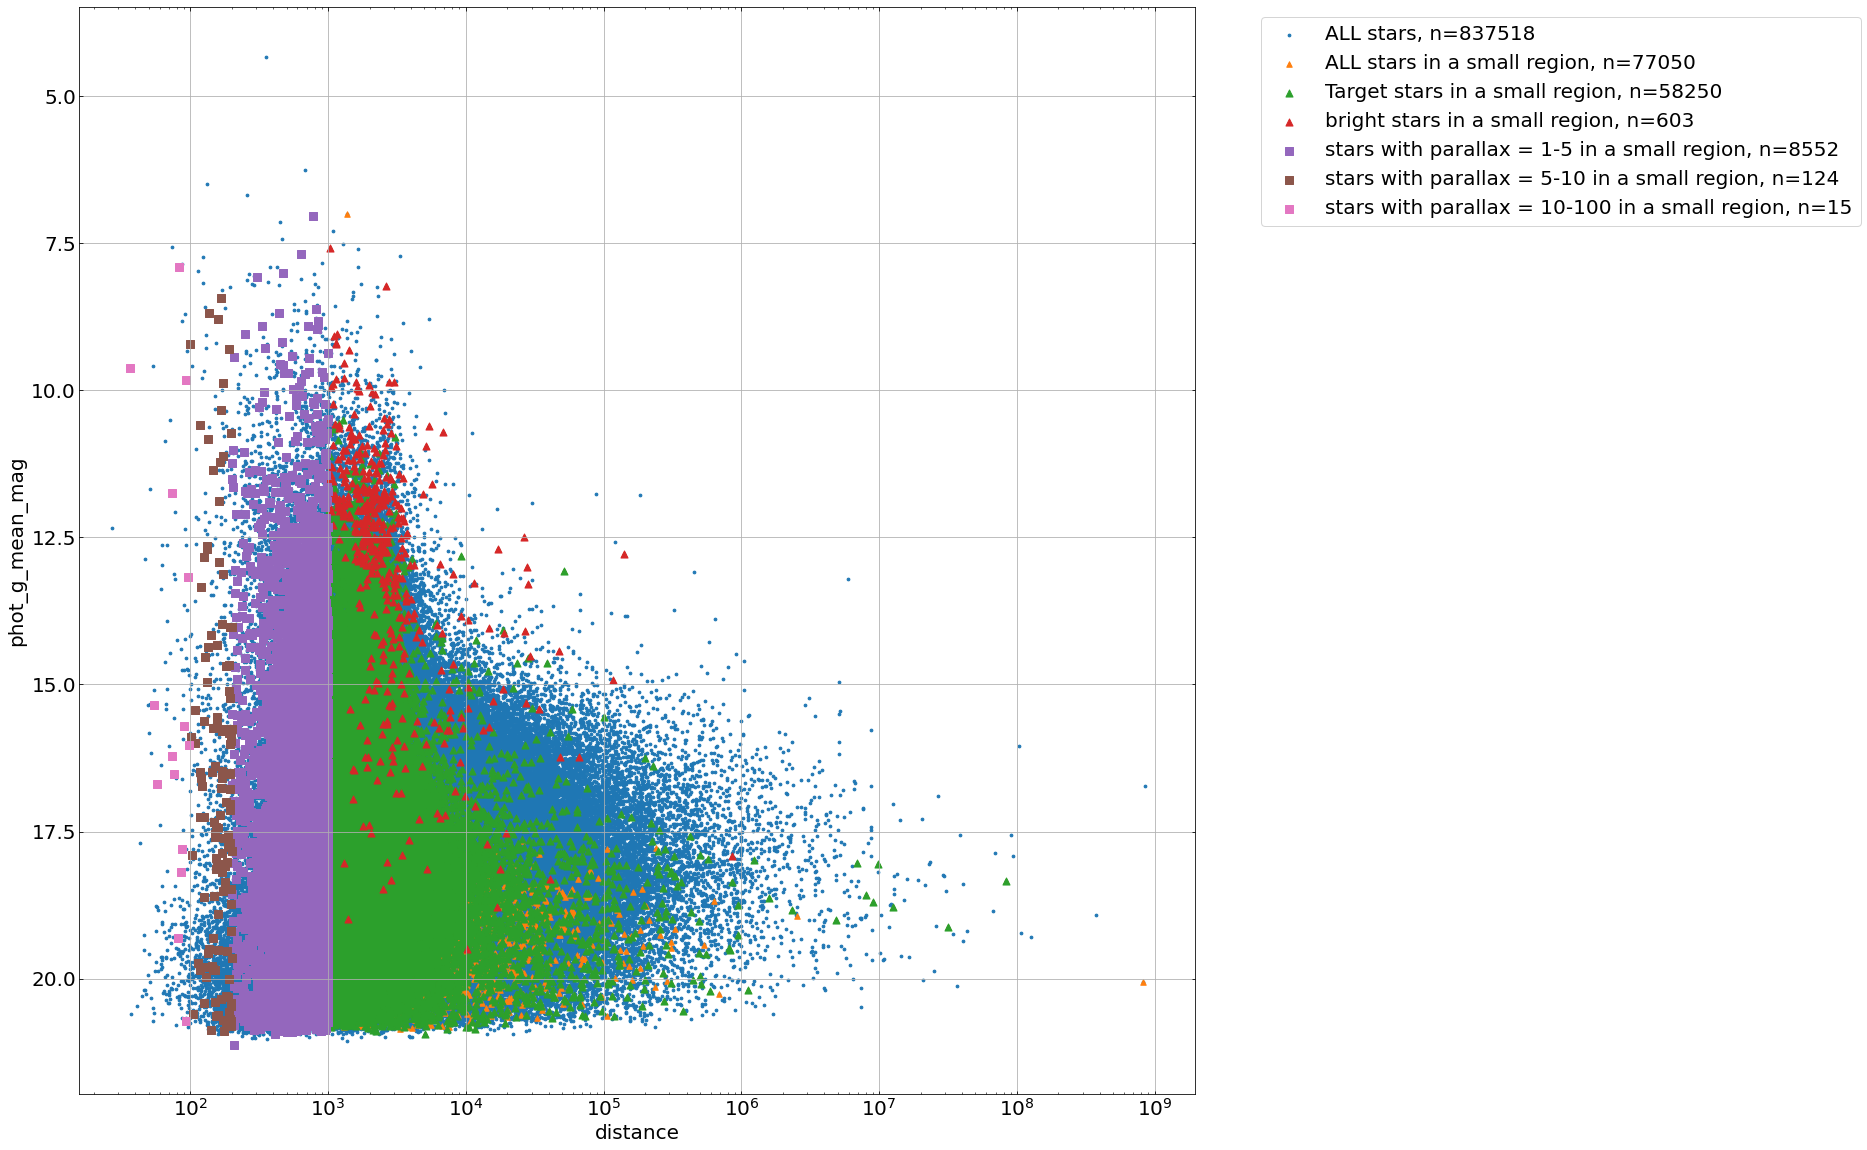

In [19]:
p1 = True   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("distance", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

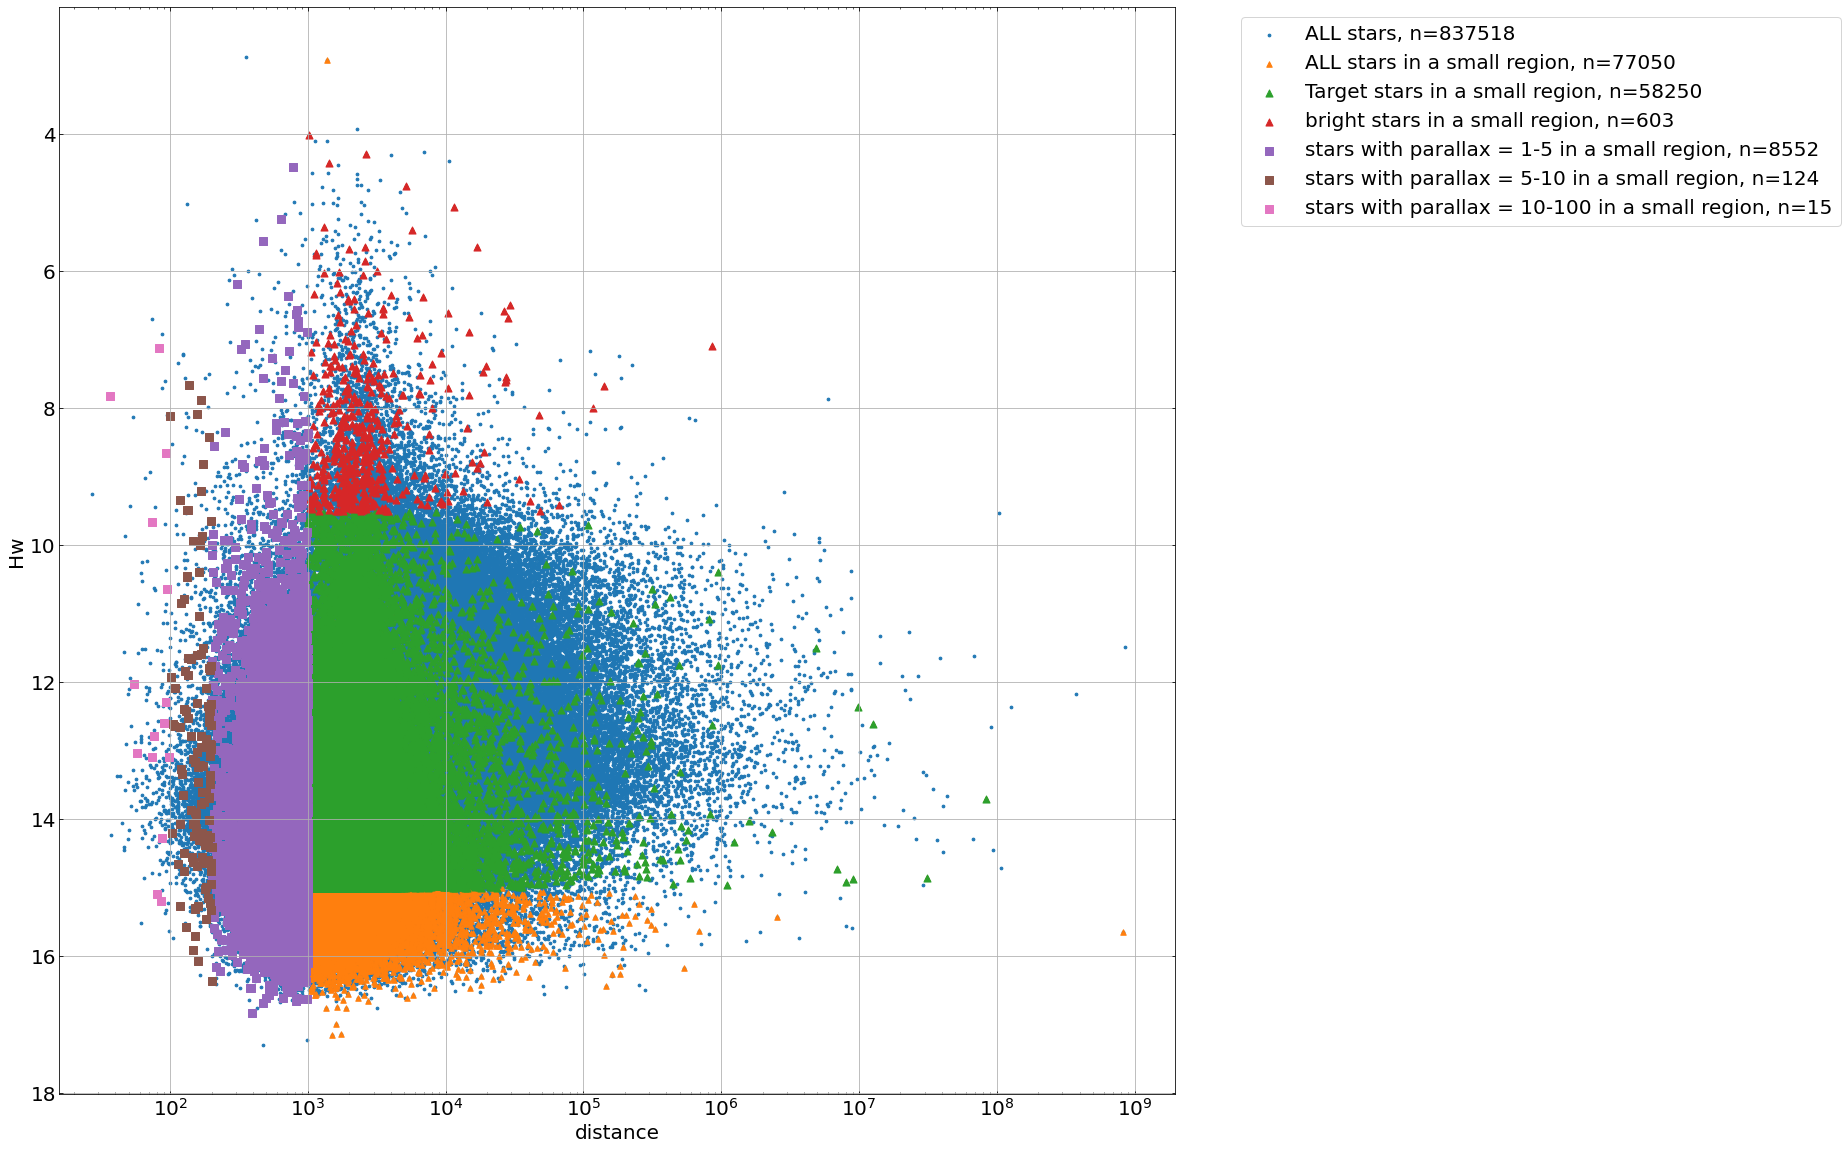

In [20]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-10
p8 = True   # stars with parallax = 1-10 in a small region
p9 = False   # stars with parallax = 10-100
p10 = True  # stars with parallax = 10-100 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("distance", "Hw", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

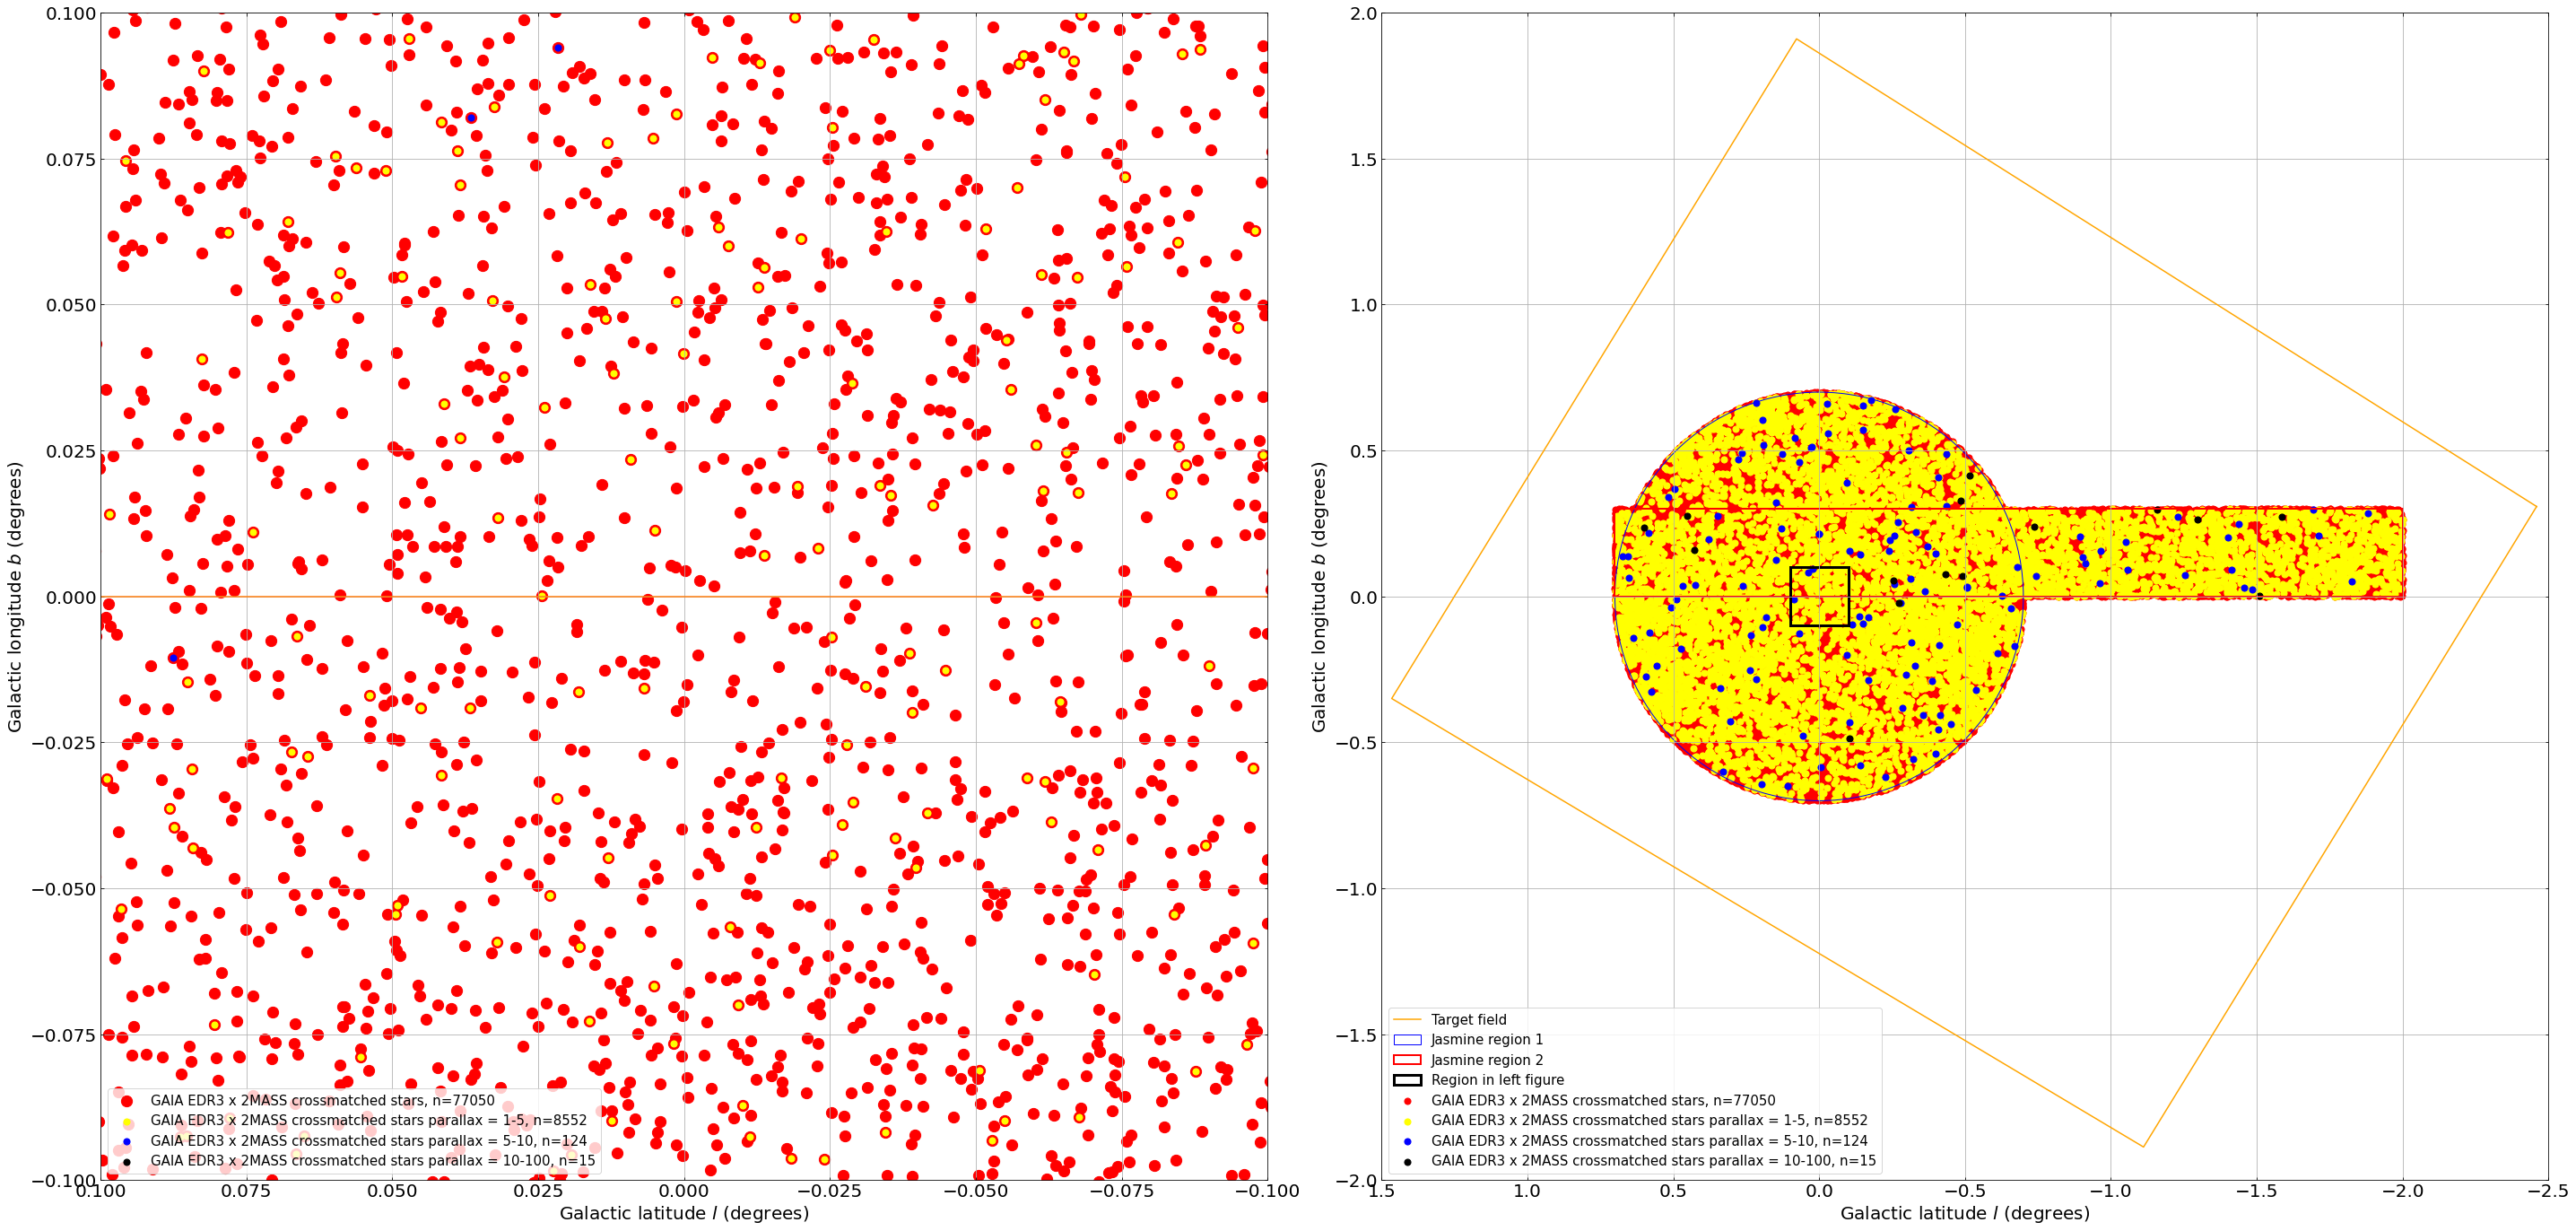

In [21]:
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=150, c="red", label="GAIA EDR3 x 2MASS crossmatched stars, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(pd_gaia2mass_jsky_f["l"], pd_gaia2mass_jsky_f["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_jsky_f)))
ax1.scatter(pd_gaia2mass_jsky_n["l"], pd_gaia2mass_jsky_n["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_jsky_n)))
ax1.scatter(pd_gaia2mass_jsky_m["l"], pd_gaia2mass_jsky_m["b"], s=50, c="black", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_jsky_m)))

ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=50, c="red", label="GAIA EDR3 x 2MASS crossmatched stars, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(pd_gaia2mass_jsky_f["l"], pd_gaia2mass_jsky_f["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_jsky_f)))
ax2.scatter(pd_gaia2mass_jsky_n["l"], pd_gaia2mass_jsky_n["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_jsky_n)))
ax2.scatter(pd_gaia2mass_jsky_m["l"], pd_gaia2mass_jsky_m["b"], s=50, c="black", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_jsky_m)))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
#fig.savefig("fov_lb.png"))))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
#fig.savefig("fov_lb.png")

In [22]:
pd_gaia2mass_jsky_m

solution_id                    designation  \
259998  1636042515805110273  Gaia EDR3 4057569236490414208   
262117  1636042515805110273  Gaia EDR3 4057573802035360896   
265872  1636042515805110273  Gaia EDR3 4057581743434796416   
363734  1636042515805110273  Gaia EDR3 4056961889452668288   
368739  1636042515805110273  Gaia EDR3 4056967490090373760   
401748  1636042515805110273  Gaia EDR3 4057072188510525312   
420673  1636042515805110273  Gaia EDR3 4056929217651884928   
420859  1636042515805110273  Gaia EDR3 4057095072096565632   
421641  1636042515805110273  Gaia EDR3 4057096446482441088   
426505  1636042515805110273  Gaia EDR3 4057103902549306752   
427107  1636042515805110273  Gaia EDR3 4057104688524235136   
432514  1636042515805110273  Gaia EDR3 4056936566324422784   
450415  1636042515805110273  Gaia EDR3 4057146985361182464   
451468  1636042515805110273  Gaia EDR3 4057150047678113536   
510905  1636042515805110273  Gaia EDR3 4057277350545375616   

                  source_id  random_index  ref_epoch          ra  ra_error  \
259998  4057569236490414208      11316228     2016.0  266.504068  0.014784   
262117  4057573802035360896    1146676834     2016.0  266.405565  0.080569   
265872  4057581743434796416     885427586     2016.0  266.531197  0.034113   
363734  4056961889452668288    1242715627     2016.0  265.364055  0.615661   
368739  4056967490090373760    1721529768     2016.0  265.416257  0.044451   
401748  4057072188510525312     408258460     2016.0  265.729525  0.014281   
420673  4056929217651884928     272346884     2016.0  265.180697  1.609703   
420859  4057095072096565632    1341341860     2016.0  266.044438  0.053967   
421641  4057096446482441088     729683904     2016.0  266.072276  0.015951   
426505  4057103902549306752      71928867     2016.0  266.262999  0.068521   
427107  4057104688524235136     653297824     2016.0  266.200800  0.149142   
432514  4056936566324422784     332054307     2016.0  265.491031  0.124488   
450415  4057146985361182464     918300407     2016.0  265.795121  0.015036   
451468  4057150047678113536     551104150     2016.0  265.693014  0.839503   
510905  4057277350545375616     110988093     2016.0  266.819411  0.036964   

              dec  dec_error   parallax  parallax_error  parallax_over_error  \
259998 -28.487362   0.012143  27.298865        0.018898          1444.505100   
262117 -28.407688   0.061874  12.006552        0.083181           144.342830   
265872 -28.301671   0.026358  18.242575        0.039691           459.616520   
363734 -29.902062   0.436968  11.676347        0.759055            15.382740   
368739 -29.766998   0.034331  10.132645        0.049513           204.645370   
401748 -29.440020   0.010658  10.452364        0.015811           661.063800   
420673 -30.142829   1.597619  10.772314        2.720756             3.959310   
420859 -29.318562   0.043436  13.562108        0.062126           218.300960   
421641 -29.264108   0.013214  13.622186        0.020909           651.489700   
426505 -29.181509   0.054624  13.193461        0.083918           157.219000   
427107 -29.125674   0.112963  17.538844        0.179253            97.844154   
432514 -30.219838   0.098640  11.422812        0.163926            69.682755   
450415 -29.177505   0.011809  10.804706        0.017314           624.055100   
451468 -29.159227   0.672923  12.367023        0.875636            14.123476   
510905 -29.278316   0.028057  11.160312        0.041350           269.898560   

                pm        pmra  pmra_error       pmdec  pmdec_error  \
259998  127.155800   -3.491541    0.017696 -127.107851     0.011562   
262117   50.611446    0.369227    0.093381  -50.610099     0.059193   
265872   91.554140   -9.974207    0.044850  -91.009206     0.026289   
363734   11.459883    6.337210    0.815684    9.548230     0.424806   
368739  125.459810   18.555155    0.061013 -124.080097     0.031304   
401748   51.903664  -12.844410    0.019482  -50.289279     0.009977

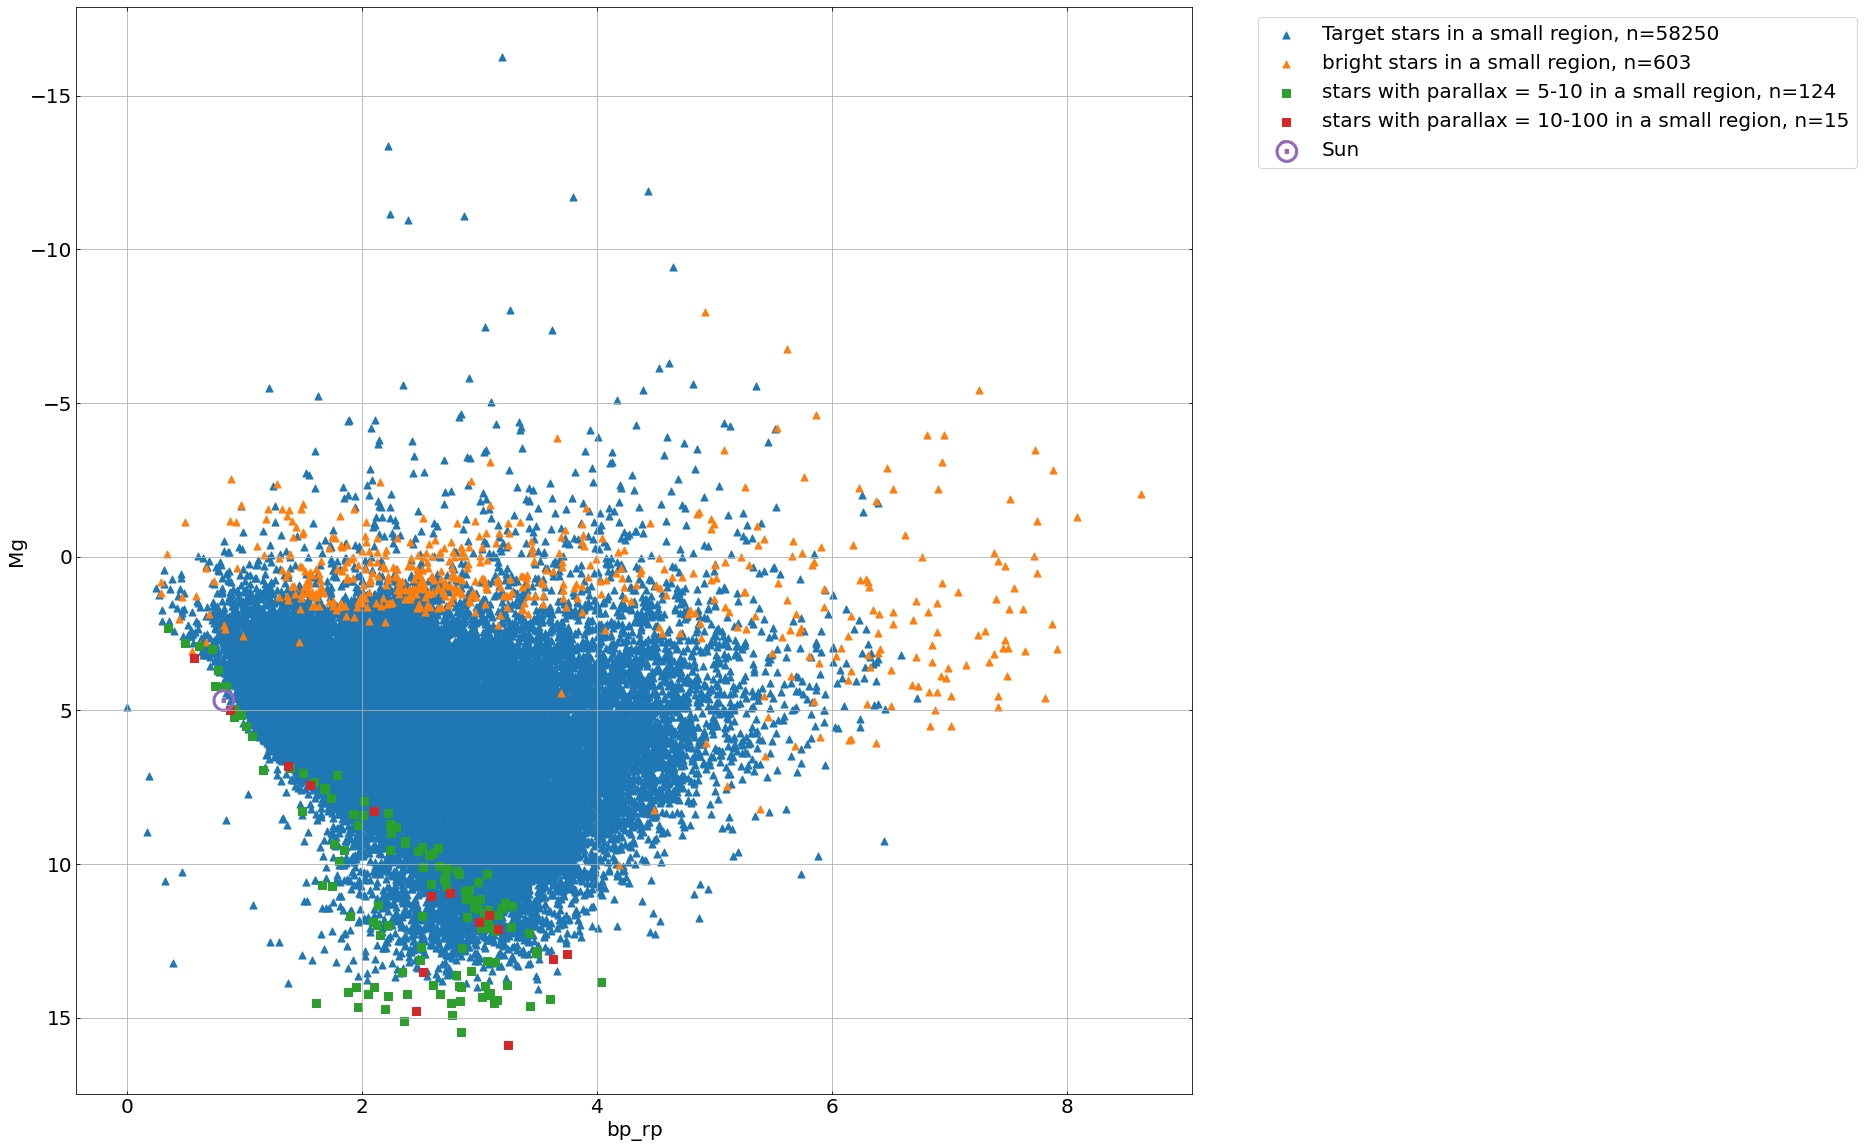

In [23]:
p1 = False  # ALL stars
p2 = False  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)